In [1]:
import matplotlib.pyplot as plt
import numpy as np

from commpy.modulation import QAMModem

from optic.dsp import pulseShape, firFilter, decimate, symbolSync
from optic.models import phaseNoise, pdmCoherentReceiver, manakovSSF
from optic.tx import simpleWDMTx
from optic.core import parameters
from optic.equalization import edc, mimoAdaptEqualizer
from optic.carrierRecovery import cpr
from optic.metrics import fastBERcalc, monteCarloGMI, monteCarloMI, signal_power
from optic.plot import pconst

import scipy.constants as const

In [2]:
help(simpleWDMTx)

Help on function simpleWDMTx in module optic.tx:

simpleWDMTx(param)
    Simple WDM transmitter
    
    Generates a complex baseband waveform representing a WDM signal with
    arbitrary number of carriers
    
    :param.M: modulation order [default: 16]
    :param.constType: 'qam' or 'psk' [default: 'qam']
    :param.Rs: carrier baud rate [baud][default: 32e9]
    :param.SpS: samples per symbol [default: 16]
    :param.Nbits: total number of bits per carrier [default: 60000]
    :param.pulse: pulse shape ['nrz', 'rrc'][default: 'rrc']
    :param.Ntaps: number of coefficients of the rrc filter [default: 4096]
    :param.alphaRRC: rolloff do rrc filter [default: 0.01]
    :param.Pch_dBm: launched power per WDM channel [dBm][default:-3 dBm]
    :param.Nch: number of WDM channels [default: 5]
    :param.Fc: central frequency of the WDM spectrum [Hz][default: 193.1e12 Hz]
    :param.freqSpac: frequency spacing of the WDM grid [Hz][default: 40e9 Hz]
    :param.Nmodes: number of polarizati

In [3]:
# Transmitter parameters:
paramTx = parameters()

paramTx.M   = 16            # order of the modulation format
paramTx.SpS = 16            # samples per symbol
paramTx.Rs  = 90e9          # symbol rate [baud]

paramTx.Nbits = 400000      # total number of bits per polarization

paramTx.pulse = 'rrc'       # pulse shaping filter
paramTx.Ntaps = 1024        # number of pulse shaping filter coefficients
paramTx.alphaRRC = 0.01     # RRC rolloff

paramTx.Pch_dBm = 0         # power per WDM channel [dBm]
paramTx.Nch     = 1         # number of WDM channels
paramTx.freqSpac = 40.0e9   # WDM grid spacing

paramTx.Fc      = 193.1e12  # central optical frequency of the WDM spectrum
paramTx.Nmodes = 2          # number of signal modes [2 for polarization multiplexed signals]

# generate WDM signal
sigWDM_Tx, symbTx_, paramTx = simpleWDMTx(paramTx)

channel 0	 fc : 193.1000 THz
  mode #0	 power: -3.01 dBm
  mode #1	 power: -3.01 dBm
channel 0	 power: -0.00 dBm

total WDM signal power: -0.00 dBm


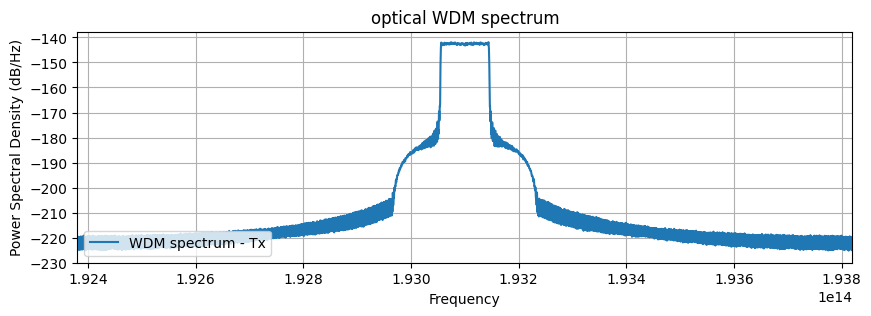

In [4]:
Fs = paramTx.Rs*paramTx.SpS # sampling rate

# plot psd
plt.figure(figsize=(10, 3))
plt.xlim(paramTx.Fc-Fs/2,paramTx.Fc+Fs/2);
plt.psd(sigWDM_Tx[:,0], Fs=Fs, Fc=paramTx.Fc, NFFT = 4*1024, sides='twosided', label = 'WDM spectrum - Tx')
plt.legend(loc='lower left')
plt.title('optical WDM spectrum');